# Chapter 8 Exercises - Dimensionality Reduction

This contains the solutions to questions 9 and 10

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm_notebook as tqdm
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [2]:
TRAIN_SIZE = 60000
TEST_SIZE = 10000
RANDOM_STATE = 42

In [4]:
def get_data(type_of_data):
    mnist_data = fetch_mldata(type_of_data)

    X_train, X_test, y_train, y_test = train_test_split(mnist_data.data, 
                                                                    mnist_data.target, 
                                                                    test_size=TEST_SIZE,
                                                                    train_size=TRAIN_SIZE,
                                                                    random_state=RANDOM_STATE)
 
    all_data = {
        'X_train': X_train, 
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }
    
    
    return all_data

In [22]:
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
def fit_classifier(clf, data, round_to=4, classifier_name='', plot_cnf_mat=False):
    X_train = data['X_train']
    y_train = data['y_train']
    X_test = data['X_test']
    y_test = data['y_test']
    
    clf.fit(X_train, y_train)
    
    test_predictions = clf.predict(X_test)
    test_cnf_mat = confusion_matrix(y_test, test_predictions)
    test_accuracy = sum(np.diag(test_cnf_mat)) / sum(test_cnf_mat.flatten())
    test_accuracy_r = round(test_accuracy, round_to)
    
    title = 'The {0} accuracy is {1:.3f}'.format(classifier_name, test_accuracy)
    
    if plot_cnf_mat:
        plot_confusion_matrix(test_cnf_mat, classes=np.unique(y_train), title='Normalized conf. matrix', normalize=True)
    
    return test_accuracy

In [31]:
def fit_pca(data):
    data_to_be_reduced = data.copy()
    pca = PCA(n_components=0.95, svd_solver='full', random_state=RANDOM_STATE)
    pca.fit_transform(data_to_be_reduced)
    
    return pca

In [ ]:
data = get_data('MNIST original')

Normalized confusion matrix
The accuracy is: 0.9467
CPU times: user 6.55 s, sys: 80 ms, total: 6.63 s
Wall time: 6.7 s


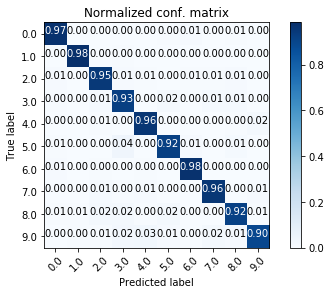

In [38]:
%%time
classifier = RandomForestClassifier()
acc = fit_classifier(classifier, data, plot_cnf_mat=True)

print('The accuracy is: {}'.format(acc))

In [ ]:
new_data = dict()
pca = fit_pca(data['X_train'].copy())

new_data['X_train'] = pca.transform(data['X_train'].copy())
new_data['X_test'] = pca.transform(data['X_test'].copy())
new_data['y_train'] = data['y_train'].copy()
new_data['y_test'] = data['y_test'].copy()

Normalized confusion matrix
(60000, 154) (60000, 784)
The accuracy is: 0.8913
CPU times: user 12.6 s, sys: 12 ms, total: 12.6 s
Wall time: 12.6 s


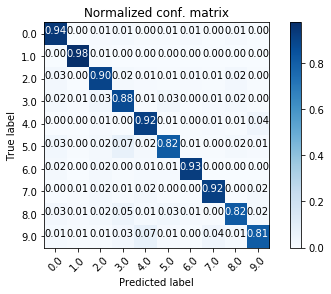

In [37]:
%%time
classifier = RandomForestClassifier()
acc = fit_classifier(classifier, new_data, plot_cnf_mat=True)

print(new_data['X_train'].shape, data['X_train'].shape)
print('The accuracy is: {}'.format(acc))

### Start of Question 10

In [ ]:
data = get_data('MNIST original')
tsne = TSNE(n_components=2)
x_new = tsne.fit_transform(data['X_test'])

# fig = plt.figure(figsize=(20, 20))
# for number_value in tqdm(np.unique(data['y_test'])):
#     indexes = np.where(data['y_test'] == number_value)
#     print(indexes.shape, indexes[0:5], number_value)
